# Wine Quality Regression Analysis

## Objective
To predict the `alcohol` content in white wine based on its chemical properties using PyCaret's regression module.

## Dataset Overview
The dataset contains the following features:
- `fixed acidity`
- `volatile acidity`
- `citric acid`
- `residual sugar`
- `chlorides`
- `free sulfur dioxide`
- `total sulfur dioxide`
- `density`
- `pH`
- `sulphates`
- `quality`
- **Target Variable**: `alcohol`

**Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)

## 1. Installation
Install the required packages:



In [14]:
pip install pycaret pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.1 MB/s eta 0:00:00
   ━━━━

In [1]:
# Import necessary libraries
import pandas as pd
from pycaret.regression import *

## 2. Load the Dataset
Load the white wine quality dataset and display its structure.

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')

# Display the shape and first few rows
print(f"Dataset shape: {data.shape}")
print(data.head())

Dataset shape: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5      

## 3. Data Summary
Generate basic descriptive statistics and check for missing values.

In [3]:
# Generating descriptive statistics
descriptive_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Creating a combined table for better visualization
combined_table = descriptive_stats.T
combined_table['Missing Values'] = missing_values

# Displaying the table
print(combined_table)

                       count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

           

## 4. Setup the PyCaret Environment
Use the PyCaret regression module to preprocess the data and prepare it for modeling.

In [4]:
# Initialize PyCaret regression environment
s = setup(data=data, target='alcohol', session_id=123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


## 5. Compare Models
Compare different regression models and select the best-performing one.

In [5]:
# Compare all models and choose the best one
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2440,0.1098,0.3304,0.9265,0.0286,0.0232,0.3410
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.2050
rf,Random Forest Regressor,0.2449,0.1242,0.3510,0.9167,0.0302,0.0231,1.9530
et,Extra Trees Regressor,0.2261,0.1252,0.3522,0.9160,0.0303,0.0213,1.1180
gbr,Gradient Boosting Regressor,0.2969,0.1538,0.3913,0.8967,0.0339,0.0284,0.7550
dt,Decision Tree Regressor,0.3049,0.2404,0.4888,0.8389,0.0420,0.0288,0.0520
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.6300
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0310
ada,AdaBoost Regressor,0.4811,0.3440,0.5863,0.7692,0.0518,0.0471,0.2920
ridge,Ridge Regression,0.6974,0.7636,0.8729,0.4892,0.0752,0.0664,0.0540


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## 6. Analyze the Best Model
Generate residuals plot and feature importance analysis for the best model.

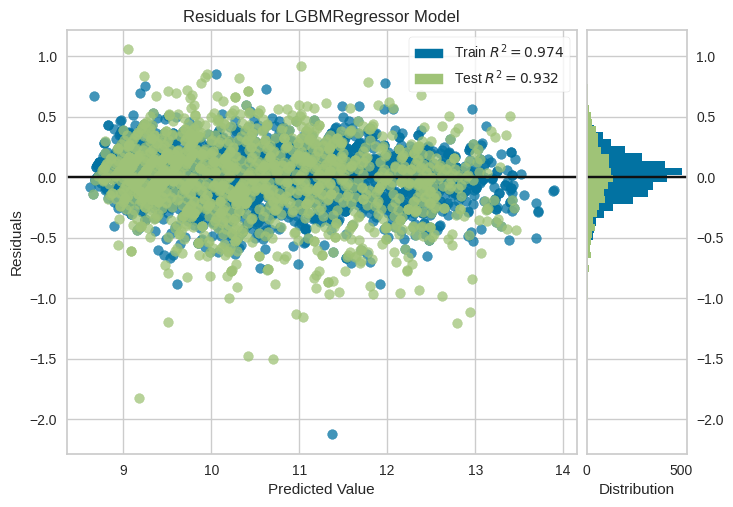

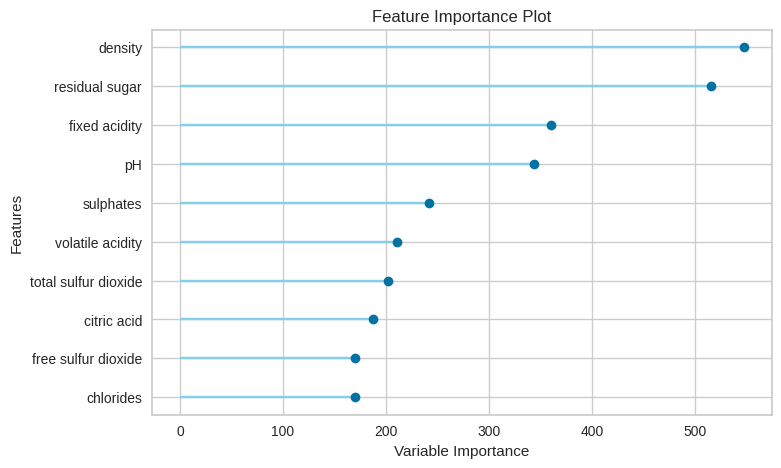

In [6]:
# Residuals plot
plot_model(best_model, plot='residuals')

# Feature importance plot
plot_model(best_model, plot='feature')

## 7. Predictions
Use the trained model to make predictions on the dataset.

In [7]:
# Make predictions on the dataset
predictions = predict_model(best_model)

# Display sample predictions in a formatted table
from tabulate import tabulate

# Print predictions in a table format
print(tabulate(predictions.head(), headers='keys', tablefmt='pretty', showindex=False))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2404,0.1029,0.3208,0.9324,0.0275,0.0227


+-------------------+---------------------+---------------------+--------------------+---------------------+---------------------+----------------------+--------------------+--------------------+---------------------+---------+--------------------+--------------------+
|   fixed acidity   |  volatile acidity   |     citric acid     |   residual sugar   |      chlorides      | free sulfur dioxide | total sulfur dioxide |      density       |         pH         |      sulphates      | quality |      alcohol       |  prediction_label  |
+-------------------+---------------------+---------------------+--------------------+---------------------+---------------------+----------------------+--------------------+--------------------+---------------------+---------+--------------------+--------------------+
| 7.400000095367432 | 0.20000000298023224 | 0.3700000047683716  | 16.950000762939453 | 0.04800000041723251 |        43.0         |        190.0         | 0.9994999766349792 | 3.0299999713897

## 8. Save the Model
Save the trained model for future deployment.

In [8]:
# Save the trained model
save_model(best_model, 'white_wine_alcohol_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'white_wine_alcohol_model.pkl